# **Fase 01**

#**Imports Necessários**


# **Matplotlib**
```
# import matplotlib.pyplot as plt
```
(Importante utilizar o "as", seria o comando de importar como)

https://matplotlib.org/


# **Librosa**
```
# impor librosa, librosa.display

```

https://librosa.org/doc/latest/index.html


# **IPython**

```
# import IPython.display as ipd
```

https://ipython.org/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/repositorio_iz"

guita.wav  teste.mp3


In [3]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

Feito os imorts necessários, agora vamos ler o arquivo de áudio.

In [4]:
BASE_FOLDER = "/content/drive/My Drive/repositorio_iz"
guitarra_sound_file = "guita.wav"

In [5]:
#load
guitarra, _ = librosa.load(os.path.join(BASE_FOLDER, guitarra_sound_file))

# **Código necessário para a criação do espectograma**

In [6]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

#**Código para verificar se o áudio foi corretamente importado**

In [7]:
ipd.Audio(os.path.join(BASE_FOLDER, guitarra_sound_file))

#**Plotando o  Espectograma!**

<ipython-input-6-88976bb66d20>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(signal))


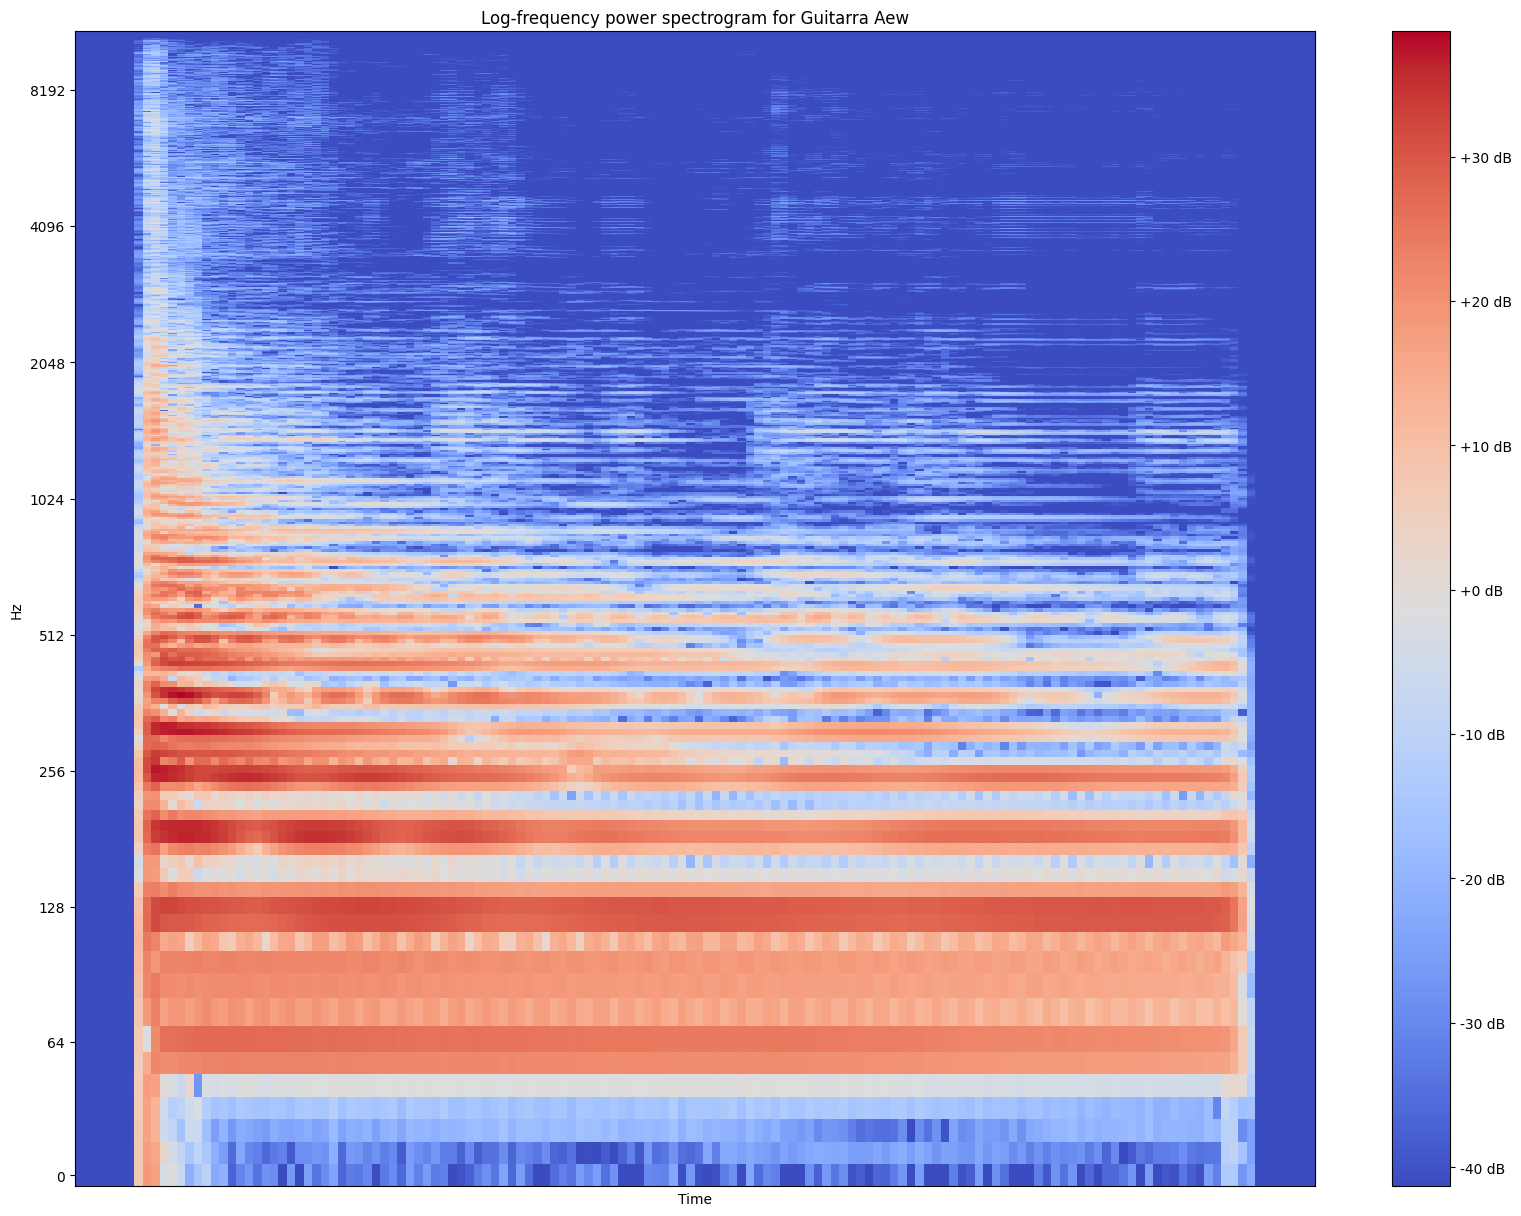

In [8]:
plot_spectrogram(guitarra, "Guitarra Aew")

#**Numpy**

Agora podemor importar o numpy e plotar o gráfico na função.

Text(0.5, 0, 'Frequency (Hz)')

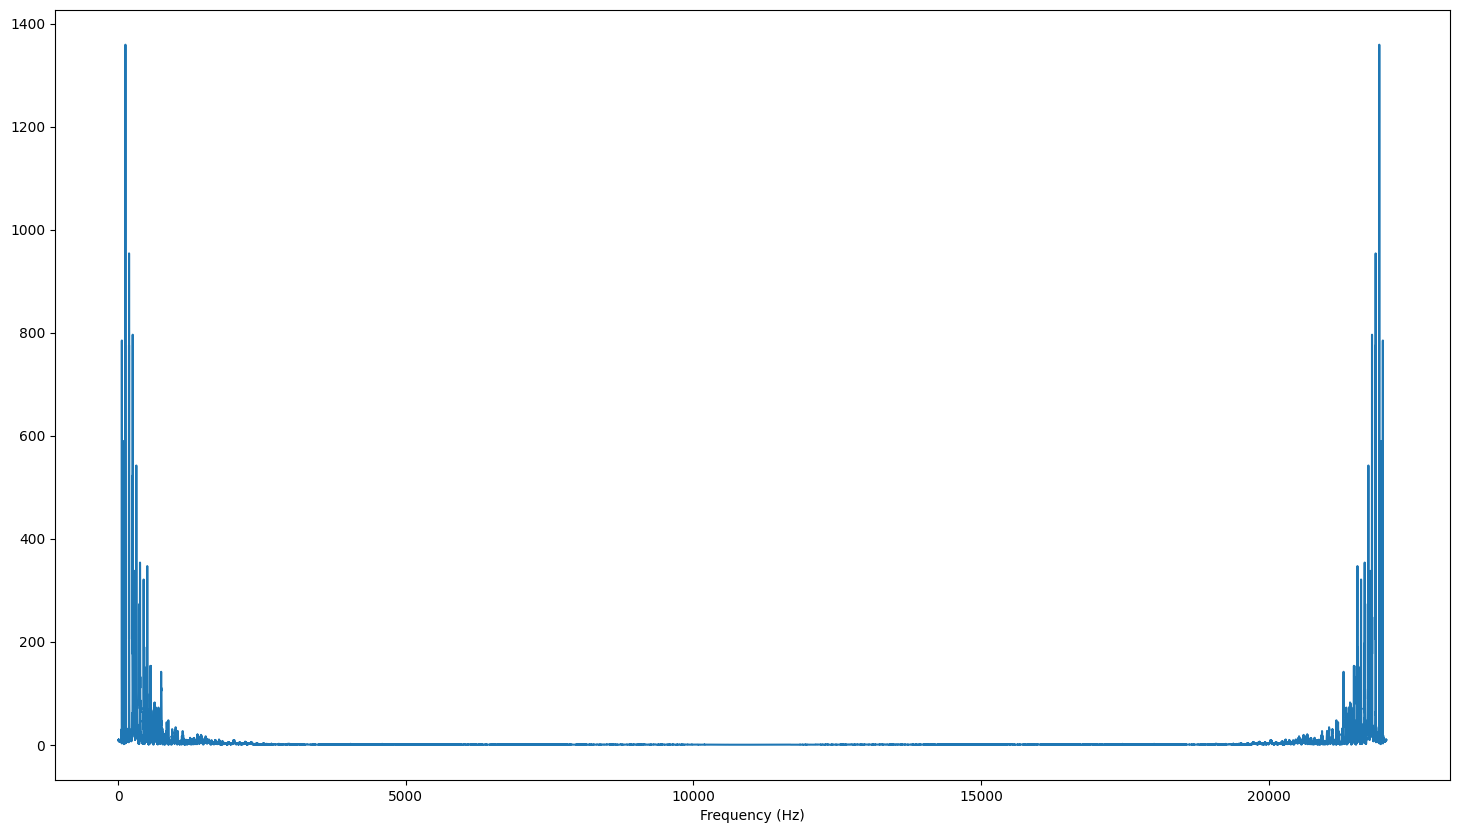

In [9]:
import numpy as np

X = np.fft.fft(guitarra)

X_mag = np.absolute(X)
f = np.linspace(0, _, len(X_mag))

plt.figure(figsize=(18, 10))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

# **FASE 02**

In [10]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# load audio file in the player
audio_path = "/content/drive/My Drive/repositorio_iz/guita.wav"
ipd.Audio(audio_path)

In [12]:
# load audio file
signal, sr = librosa.load(audio_path)

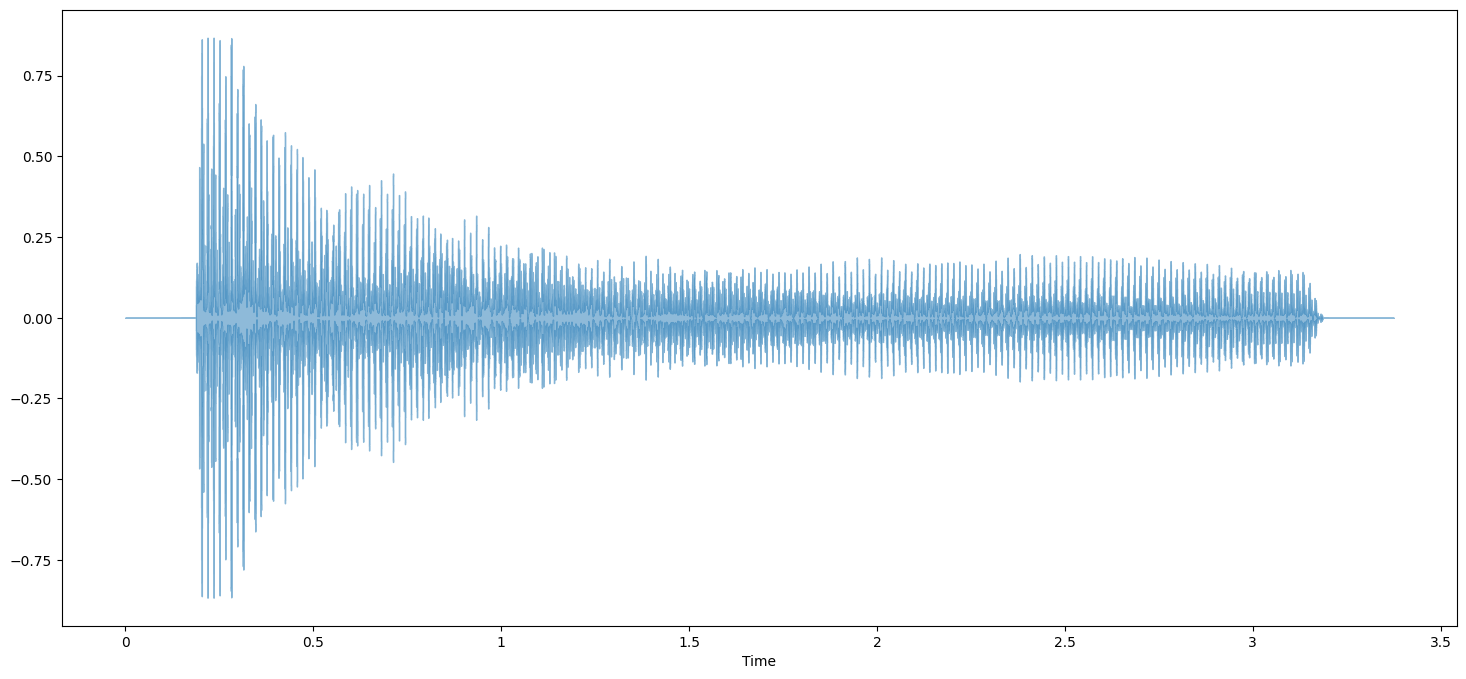

In [13]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [14]:
# derive spectrum using FT
ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

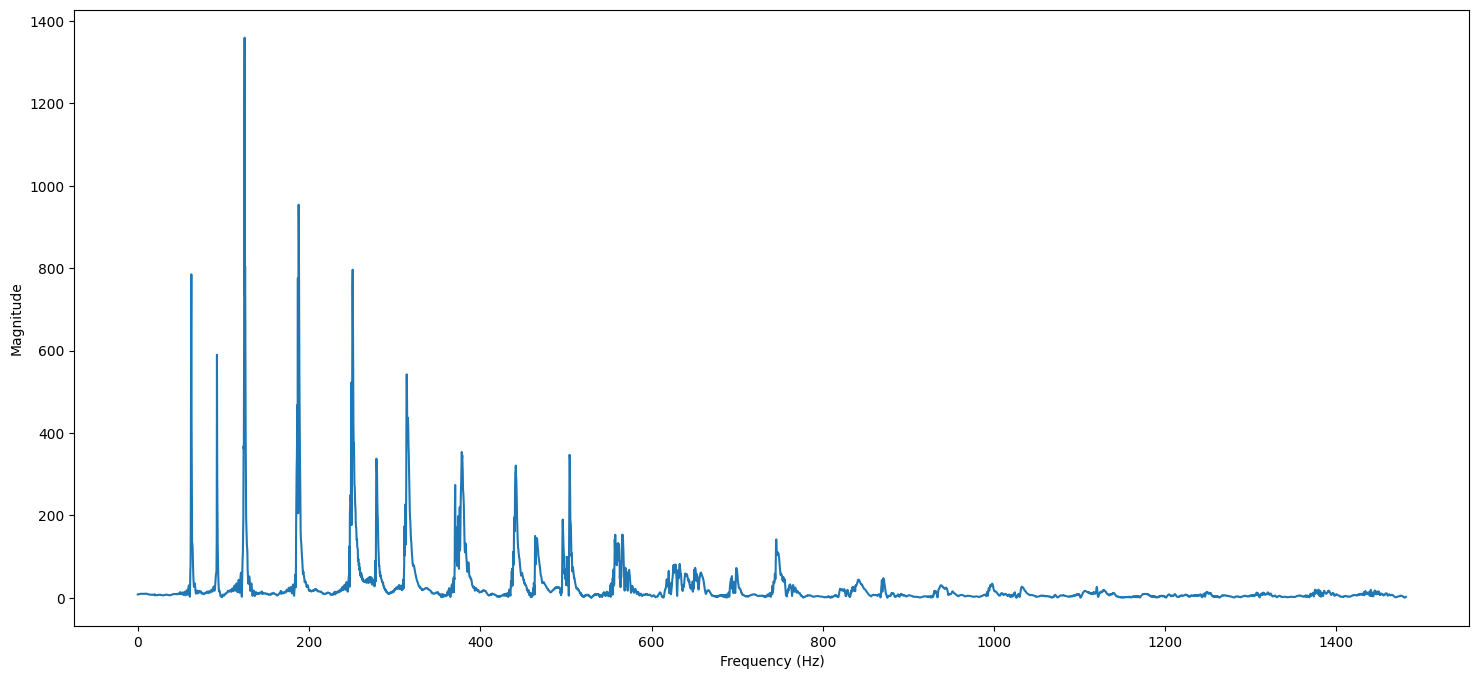

In [15]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [16]:
len(signal)

74419

In [17]:
d =  1 / sr
d

4.5351473922902495e-05

In [18]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [19]:
d_400_samples = 400 * d
d_400_samples

0.018140589569160998

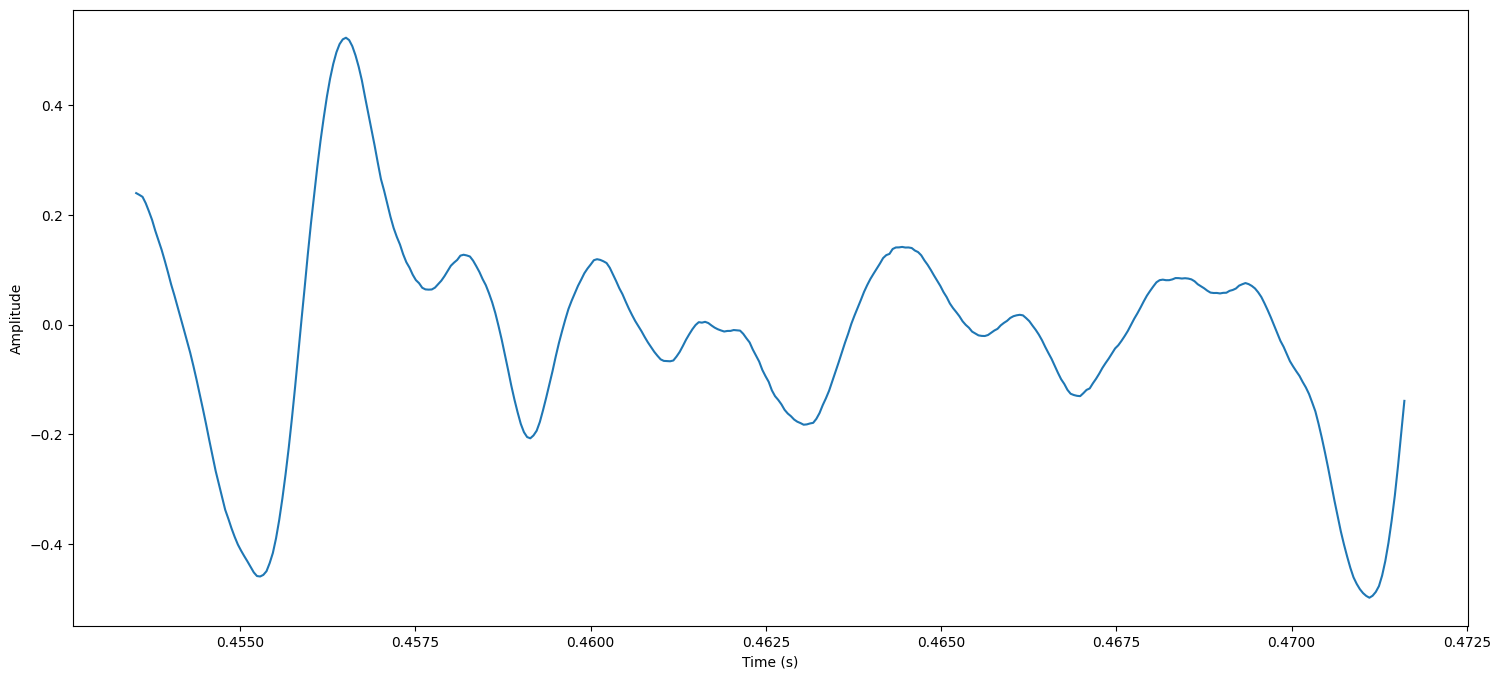

In [20]:
# zomm in to the waveform
samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

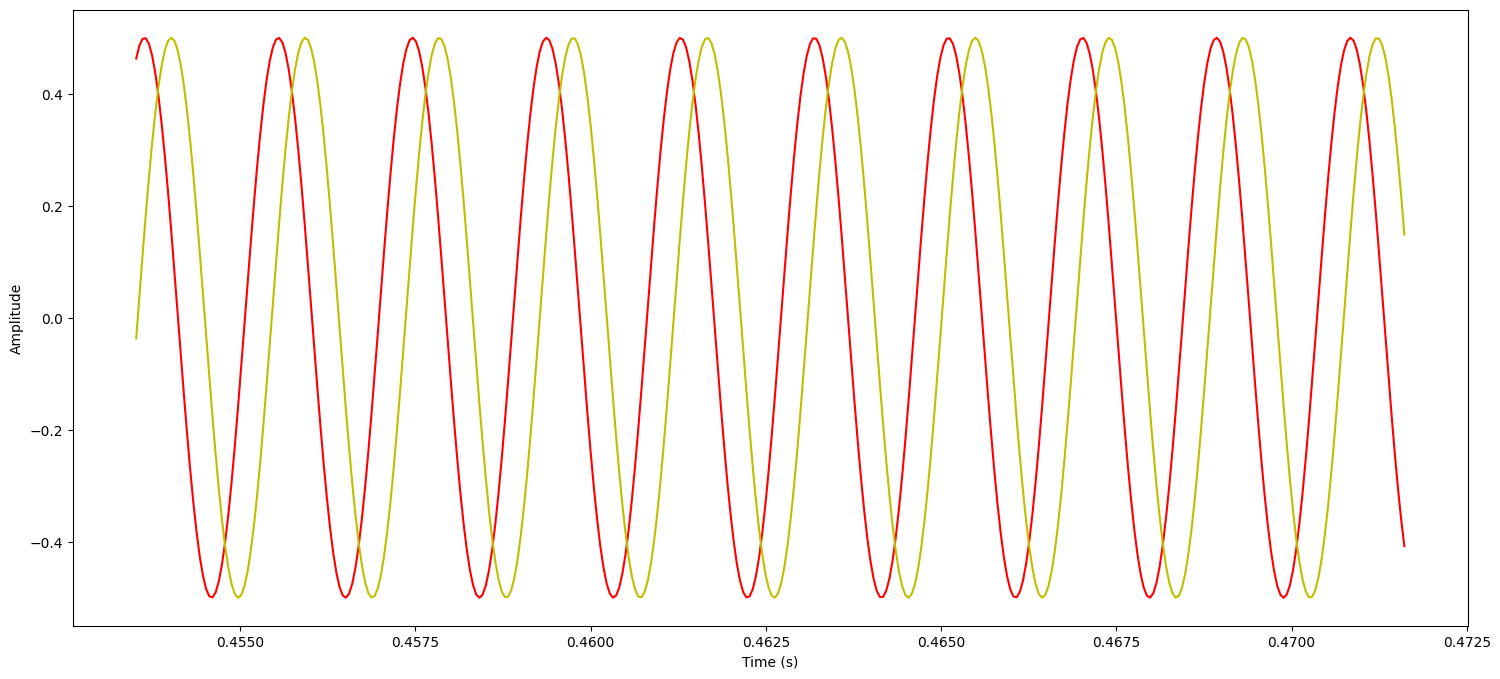

In [21]:
# create a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")


plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

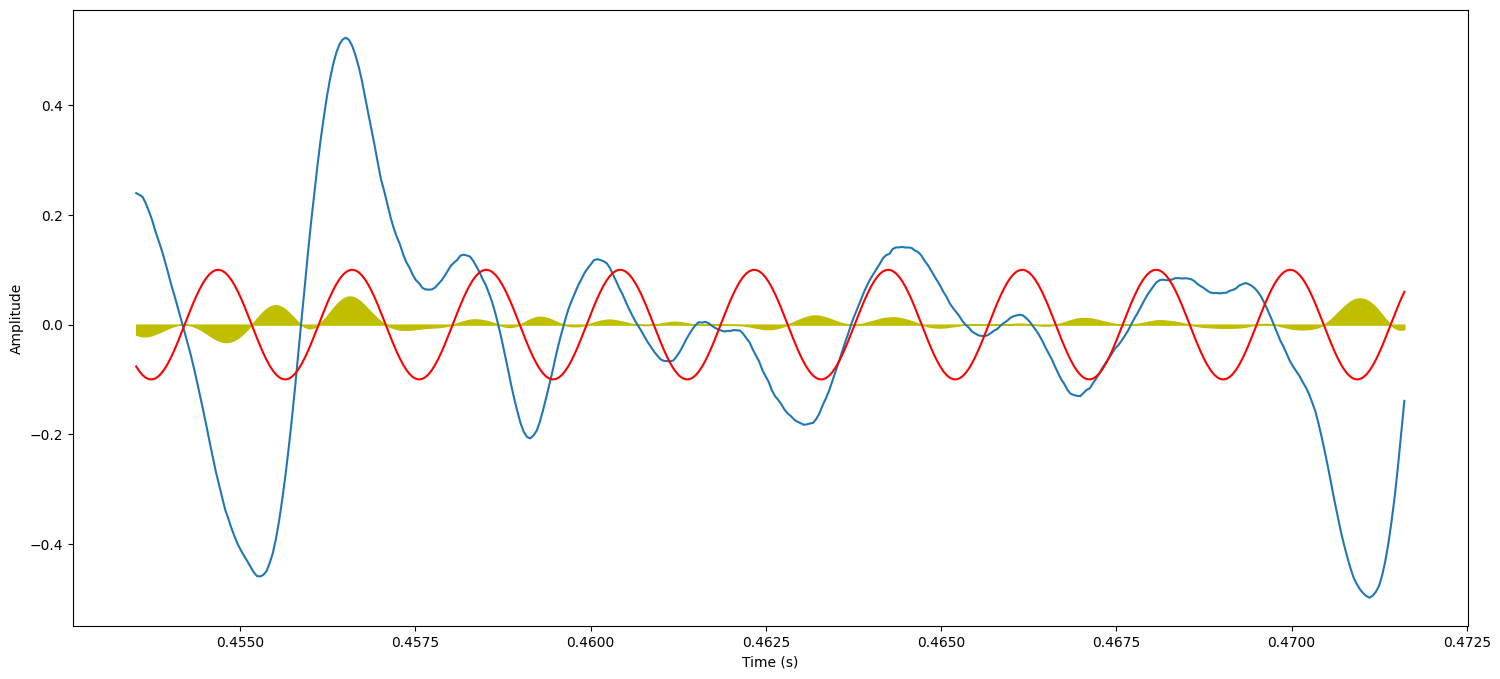

In [22]:
# compare signal and sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400])
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

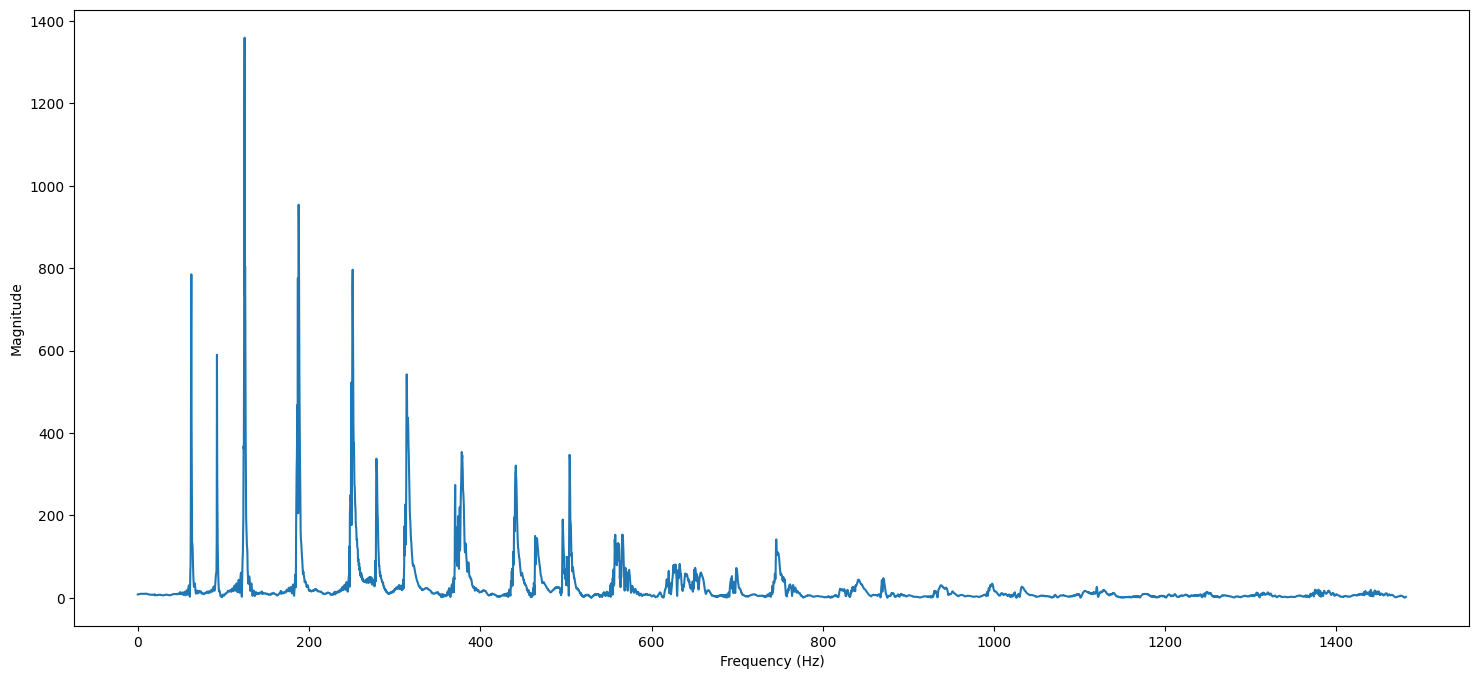

In [23]:
# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

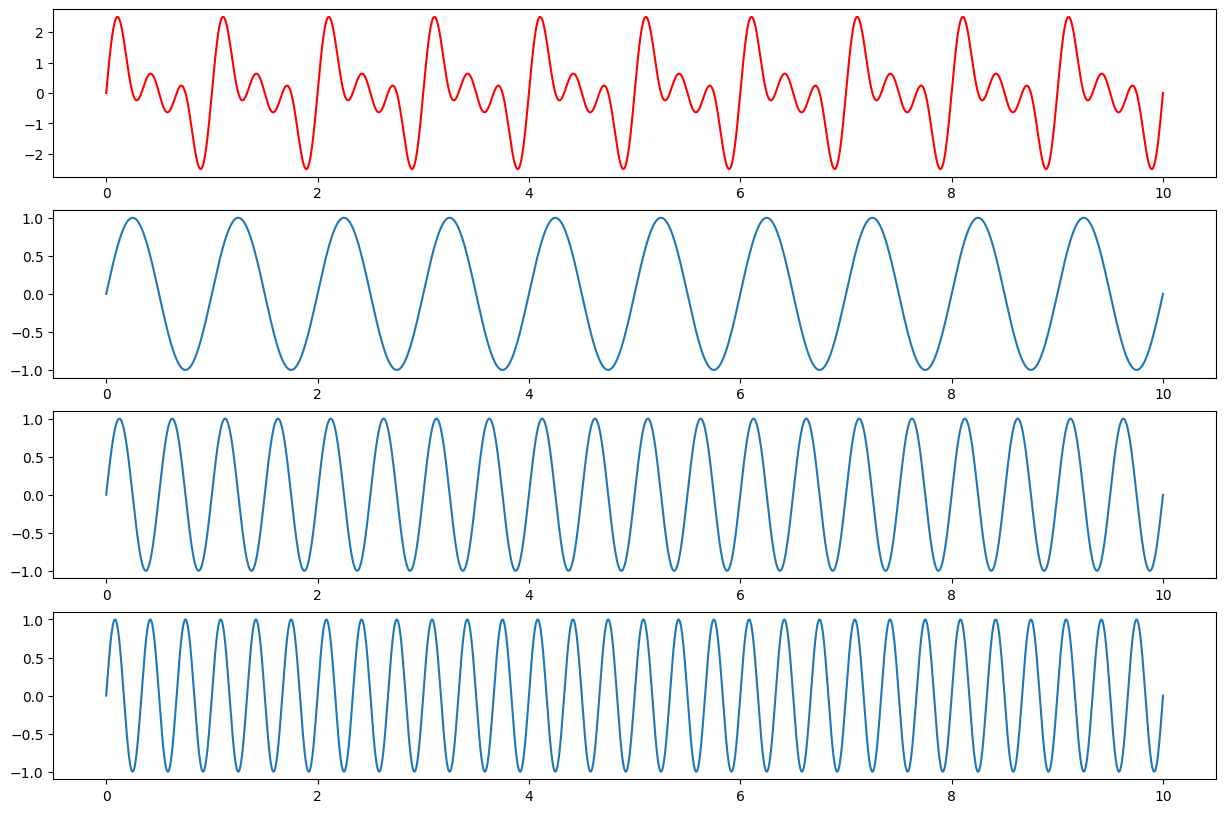

In [24]:
# superimposing pure tones
f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()